<a href="https://colab.research.google.com/github/liyachittilappilly/iris-svmproject/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
d = pd.read_csv("/content/iris.csv")
d.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
yfun = lambda x: 0 if x=="versicolor" else 1 #new column 'yfun', to find versicolor species or not

d["yfun"] = d["Species"].apply(yfun)
d[d['yfun']==0].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,yfun
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


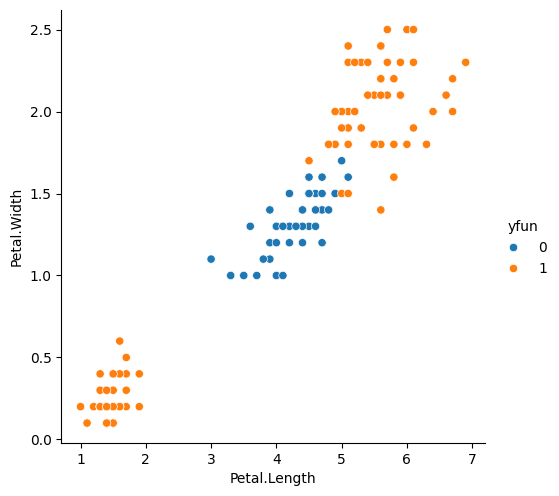

In [ ]:
import seaborn as sns
sns.pairplot(d, x_vars = "Petal.Length",y_vars="Petal.Width",  hue="yfun",height=5)

In [ ]:
from sklearn.svm import SVC

X = d[["Petal.Length","Petal.Width"]]
Y = d["yfun"]

model = SVC()
model.fit(X,Y)
model.score(X,Y)

0.9533333333333334

Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

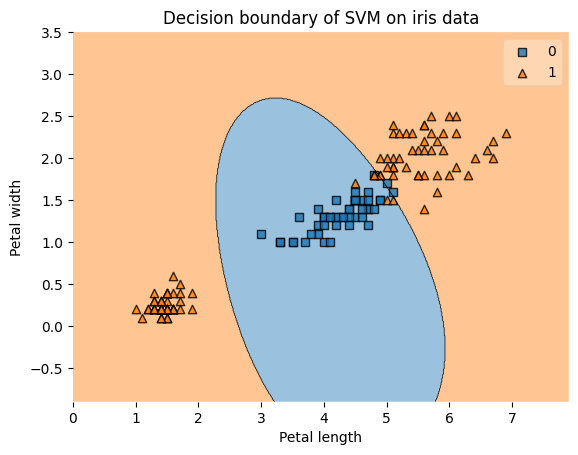

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
features = np.array(X)  #convert X to a NumPy array
target = np.array(Y).ravel() #convert Y to a flat NumPy array
plot_decision_regions(features,target,clf=model) #line/ curve the SVM uses to separate target
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')

In [ ]:
#encoding categorical labels into number
d.loc[d.Species=="setosa","Species"] = 0
d.loc[d.Species=="versicolor","Species"] = 1
d.loc[d.Species=="virginica","Species"] = 2

d.Species = d.Species.astype("category")
d.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,yfun
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

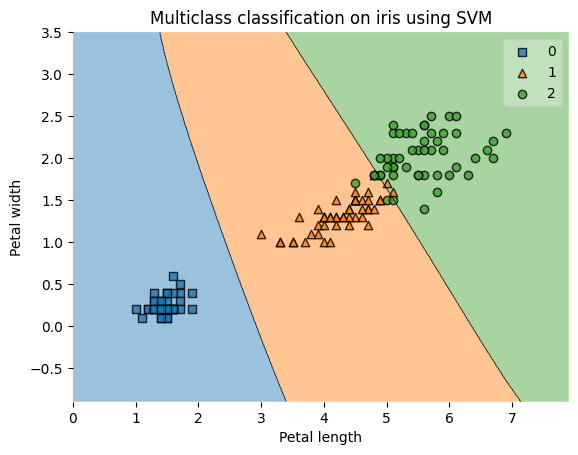

In [ ]:
X = d[["Petal.Length","Petal.Width"]]
Y = d["Species"]

model = SVC()
model.fit(X,Y)

from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y)
plot_decision_regions(features, target, clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')